


<div class="alert alert-block alert-info">   

#
#### Instructor: Martha Essak  

</div>

## Instructions and reminders for Jupyter notebooks

**Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

### Name:
<code style="background:yellow;color:black">

<br>
Abhishek Kumar
Scarlett Jhonson 
</code> 

---

## Table of Contents
[Project description](#Description)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  
[Explanatory model](#Explanatory)


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, you will develop appropriate models, compare the models, and discuss advantages and limitations of each model. You should select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

----

<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.5 marks)
  
### Prepare all plots for publication by including detailed axis labels.
    
### Complete anwers will include observations and conclusions/interpretations.
<div>

<div class="alert alert-block alert-success">
<a id="Introduction"></a>  

# Introduction & Approach
Write an introduction to the project and explain the overall approach.  

What to include: objective and purpose of the analysis, background information, brief description of the approach that is being taken in the analysis. If you include any references, please put the bibliographical information at the end of your introduction; this does not contribute to the word count. Make sure to write in your own words.  

</div>

The time series forecast we are trying to predict the future(Kindoff) energy usage of the Vancouver airport so as to give the policy makers a better understanding for future energy negotiations with power companies. WE would also be able to identify how the enegry consumotion is impacted with the various paramters across the year. WE can provide the recommendation for the ways the energy usage can be reduced by looking the peak and lowest energy consumption period. The company has provided the data for the 14 years of the energy usage data and other relevant associated data like temprature outside, total passengers every month. 

We would be using two models to diffrent methods i.e. ETS models and ARIMA models to forecast. We would be building various models of each category as per the requirment and as per the Time serries plots. WE would be splitting our dataset into Train and Test data. WE would than use the Train data to build and try various models of both methods. After the models build, we would be forecast the test data and compare our forecasted values with test data. The model with the lowest error and best fit would be choosen to be our final model to predict in the future.

We would also be looking for the limitaion of our models so as to be aware of pitfalls of over relying on the forecast of the model.
The 

 
 
**References**

###### https://www.fingent.com/blog/why-time-series-forecasting-is-a-crucial-part-of-machine-learning/#:~:text=Time%20series%20forecasting%20is%20a%20technique%20in%20machine%20learning%2C%20which,time%20to%20predict%20future%20events.&text=Time%20series%20allows%20you%20to,seasonality%2C%20cyclicity%2C%20and%20irregularity####

In [1]:
#imoort functions 
library(ggplot2)
#library(ggfortify)
library(fpp2)
library(seasonal)
library(forecast)
#install.packages('forecast', dependencies = TRUE)


Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'fpp2' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
-- Attaching packages -------------------------------------------------------------------------------------- fpp2 2.4 --
v forecast  8.14     v expsmooth 2.3 
v fma       2.4      
Warning message:
"package 'forecast' was built under R version 3.6.3"Warning message:
"package 'fma' was built under R version 3.6.3"Warning message:
"package 'expsmooth' was built under R version 3.6.3"
Warning message:
"package 'seasonal' was built under R version 3.6.3"

---
### Import the data

In [73]:
data=read.csv("C:/Users/abhis/Documents/UBC/Classes/PERIOD4/BABS 502/Projects/energy_yvr.csv")
tail(data)

,month,energy,mean.temp,total.area,total.passengers,domestic.passengers,US.passengers,international.passengers
163,10-Jul,8149,18.1,319585,1667.07,844.64,424.63,397.79
164,10-Aug,8813,18.2,319585,1704.74,886.16,421.92,396.66
165,10-Sep,8154,15.3,319585,1417.72,740.51,325.56,351.65
166,10-Oct,7635,11.3,319585,1331.31,721.73,308.32,301.25
167,10-Nov,7932,5.1,319585,1176.74,623.44,293.05,260.25
168,10-Dec,7975,4.9,319585,1352.50,716.61,331.34,304.56


<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Exploratory Data Analysis 

Create plots of the electricity use data (**use all the data, not just the training set**); prepare them as if for publication and upload them. Include a decomposition plot from STL decomposition.  

Describe the characteristics of trend, cycle and seasonality in detail, referring to specific characteristics of the plots. Also mention any unusual features, if present. Be specific.  

<br>

Organize your answers as follows; or discuss trend/cycle together:  

Trend: ...  

Seasonality: ...  

Cycle: ...  

Unusual features: ...  
</div>

The data of vanacouver the ariport energy usage is plotted below with seasonal plots, acf and time sereies plot. The following data has follwing features:- 

***Trend***: There is increasing trend in the energy consumption as can be seen from the time series plot. The trend is moving up with looking more a additve trend.  This could be seen from the data that no. of passengers steadily increased over thr period of time and hence more consumption of energy for various usage like, Lighiting, Baggage Conveyor, passgemger lifts, Jet bridge.We can see from the ACF plot overall decaying suggesting about the trend.  The acf shows a significant auto-corelation as our data is outside the blue line.

***Seasonality***: From analysing the timeseries plot and the seasonal plot we can see strong seasonality in our dataset. The plot shows that lowest usage of the electricity is in the month of March and the highest with increasing gradually over the month and peaking in the month of August( this could be due to increased vacaction travel by people and also international studnets arriving after breaks or new students) and then subsequently falling in remaining months till October and then increasing in winter months(it could be due to lower tempratures outside in the winters. From the acf plot we can see waviness and is moving up down , which shows seasonality.

***Cycle***: From the plot we cannot see any particular cyclic pattern in the data.We would need more data to ascertain if any cyclicity exsits in the system.

***Unusual features***: There was one particular unusual feature as can be seen from the remainder plot. We could see there in 1999 and 2000. We can see there was significant unusual observation is not captured in the time series plot is captured in the remainder plot of STL.
--- YVR's Vancouver Airport Services created an energy reduction committee in 1999 to create new energy-reducing initiatives. The YVR website describes these different initiatives such as "installing an econo-mode setting on baggage conveyor belts to shut down conveyors when no bags are present; installing carbon dioxide sensors to control heating, ventilation and air conditioning (HVAC) according to the number of people in area; and patenting a black box to regulate electrical power to the flight information display monitors when no flights are scheduled." ---  

We have some fluctuation in 2004- 2006 -
***reference***
##### https://en.wikipedia.org/wiki/YVR_Sustainability ######

There was one particular feature as can be seen from the time series plot. There is increasing trend in start since the data is presented to but if we see in the error plot, we can see there was significant dip in 

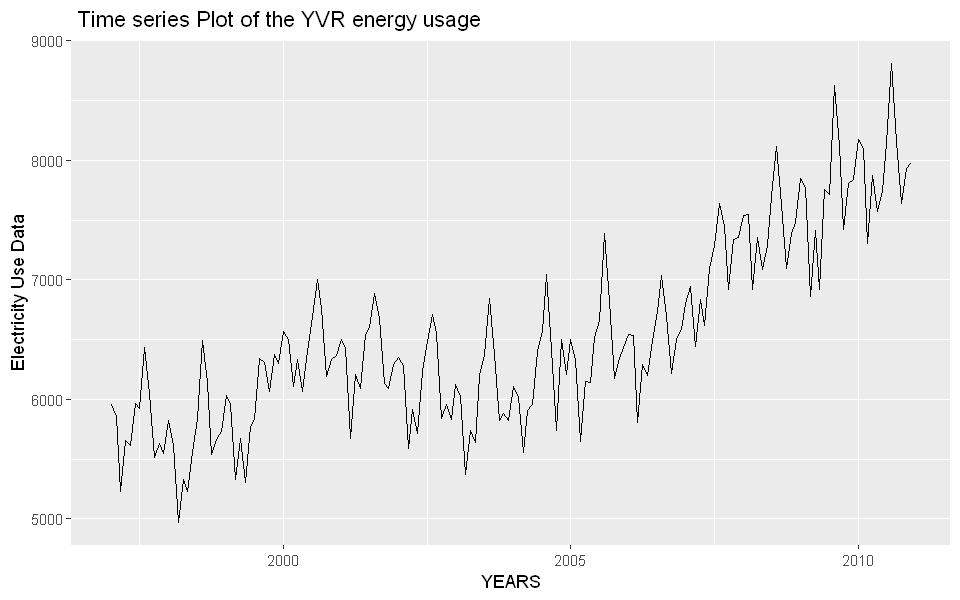

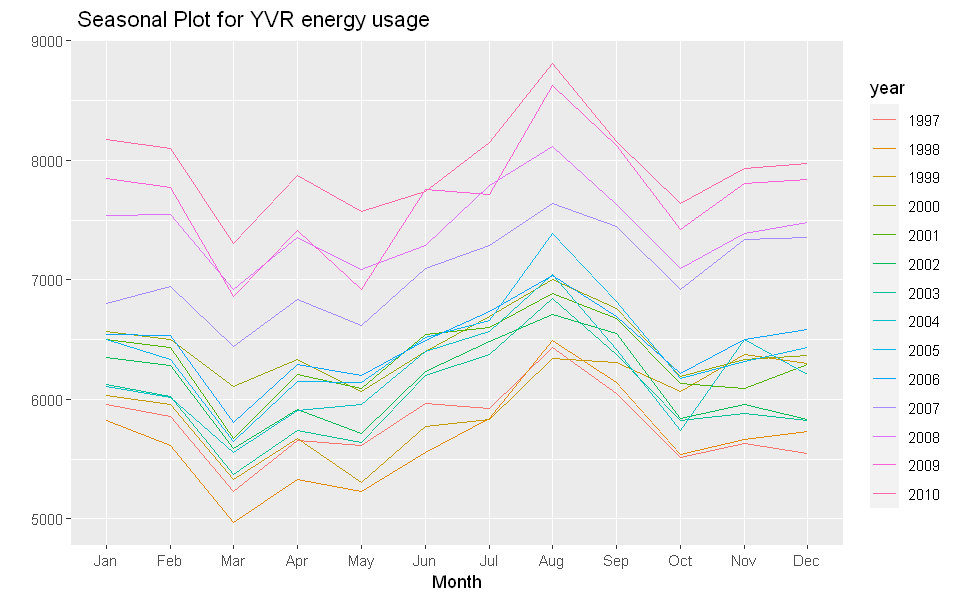

In [74]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(1,2))

#### time plot ###
mydata1.ts <- ts(data[,2],start= c(1997 , 1),  frequency= 12)
autoplot(mydata1.ts ) +
  ggtitle(" Time series Plot of the YVR energy usage ") +
  xlab("YEARS") +
  ylab("Electricity Use Data")  

### season plot###

ggseasonplot(mydata1.ts)+
ggtitle(" Seasonal Plot for YVR energy usage ")

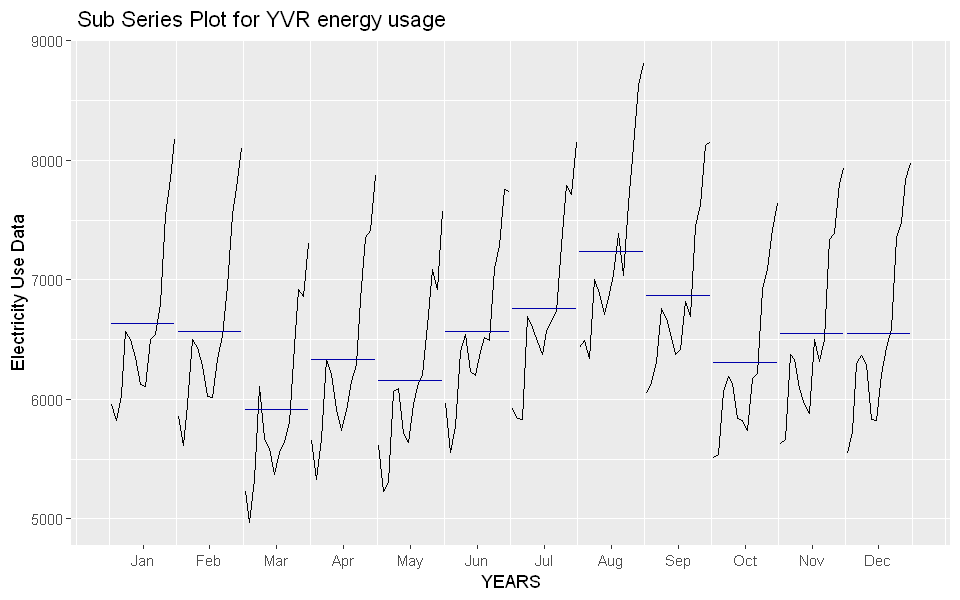

In [75]:
### Subseries plot to undersatnd the monthly fluctuation of the energy data in more deatil.
ggsubseriesplot(mydata1.ts)+
ggtitle(" Sub Series Plot for YVR energy usage ")+
xlab("YEARS") +
ylab("Electricity Use Data") 

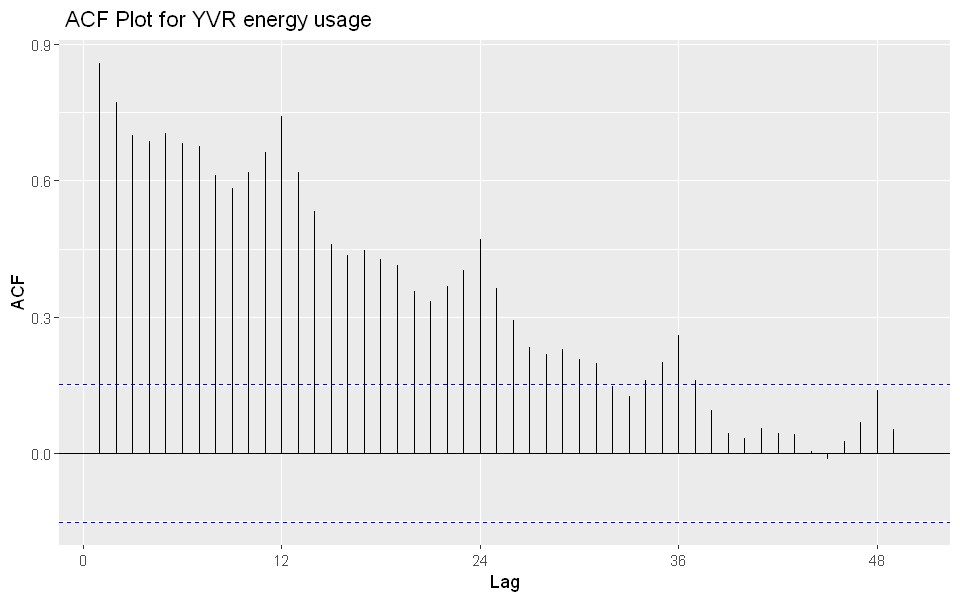

In [76]:
ggAcf(mydata1.ts, lag = 50)+
ggtitle(" ACF Plot for YVR energy usage ")

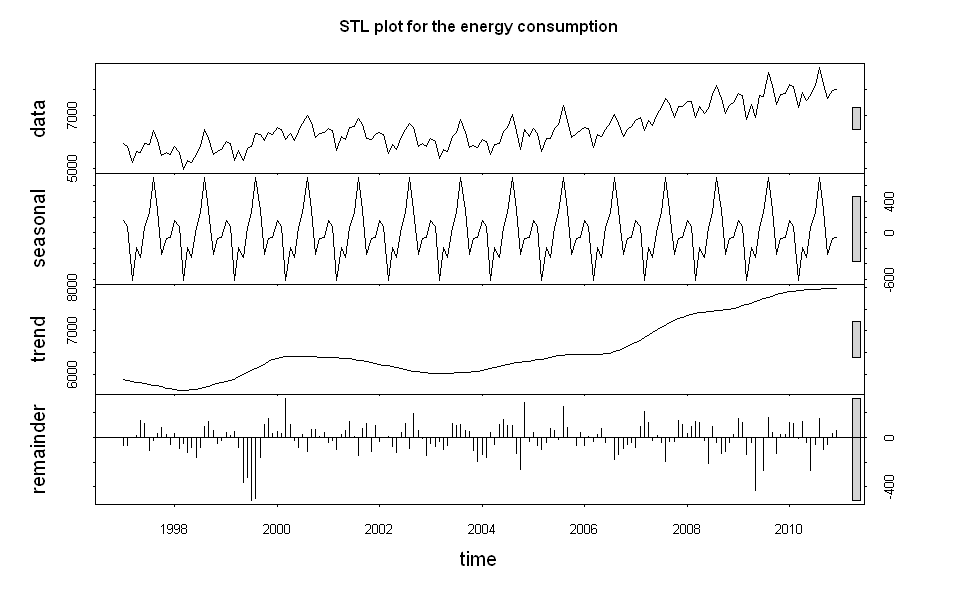

In [77]:
### Stl plot of the Yvr dataset
fit.stl <- stl(mydata1.ts, s.window="periodic", robust=TRUE) # periodic means that the seasonality is not allowed to change over time. 
plot(fit.stl, main= "STL plot for the energy consumption")

<div class="alert alert-block alert-warning">
<a id="Causes"></a>

# Potential causes 

Describe what could be causing the patterns that you are seeing in electricity use. Create any relevant plots and include them. Make sure to discuss any specific features of plots. (300 words max.)  
</div>

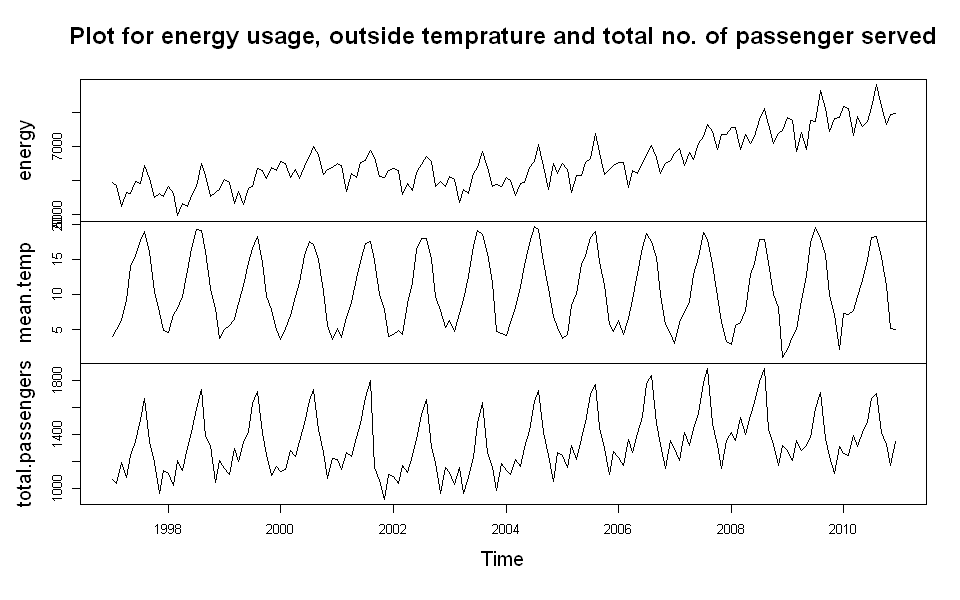

In [82]:
# time sereies plot of the data
alldata.ts <- ts(data[c(2, 3, 5)],start= c(1997 , 1), frequency= 12)
plot(alldata.ts,  main= "Plot for energy usage, outside temprature and total no. of passenger served")

----

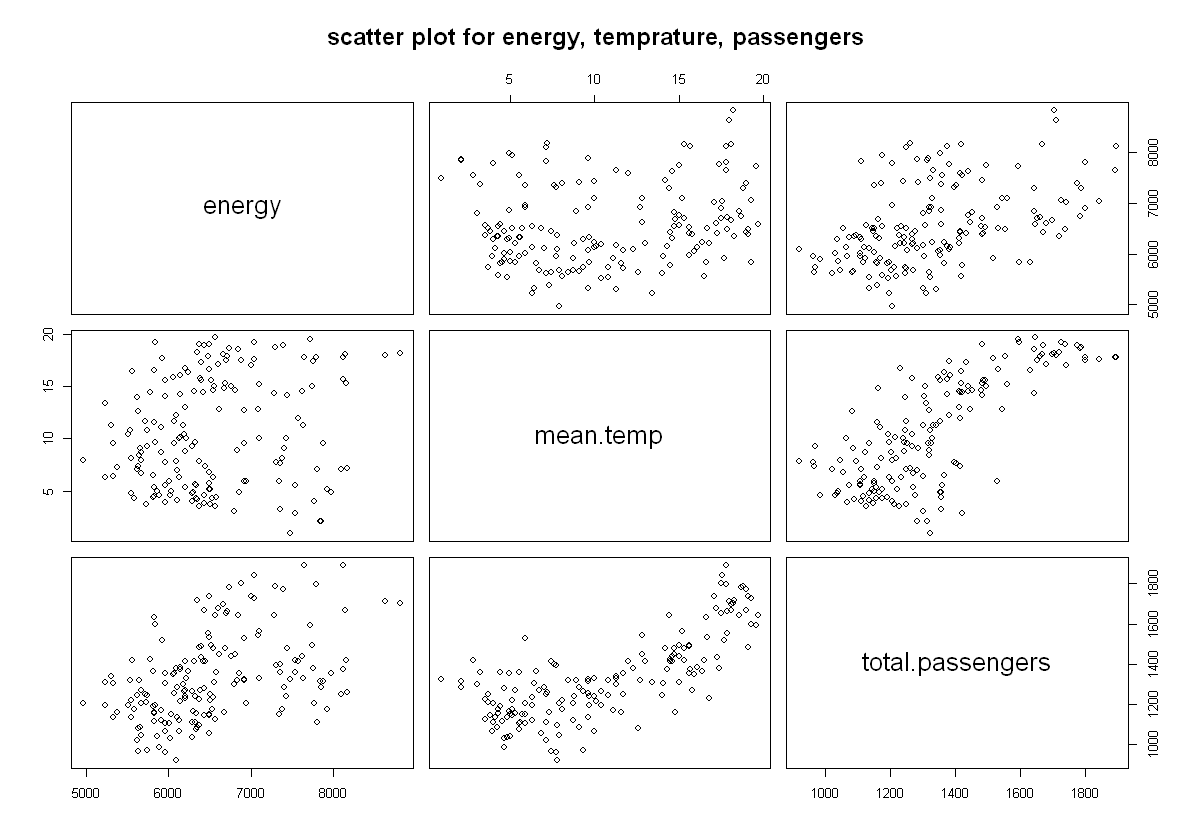

In [59]:
plot(data[c(2, 3, 5)], main= "scatter plot for energy, temprature, passengers ")

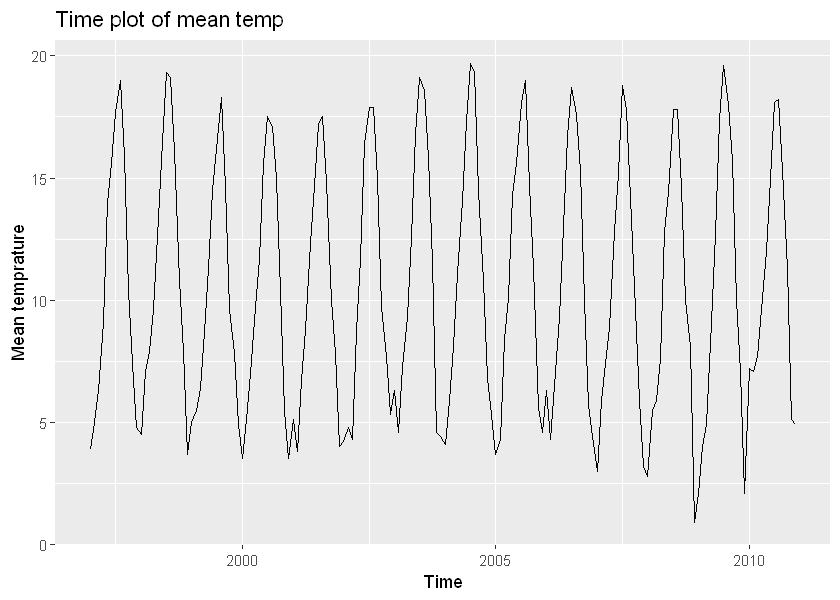

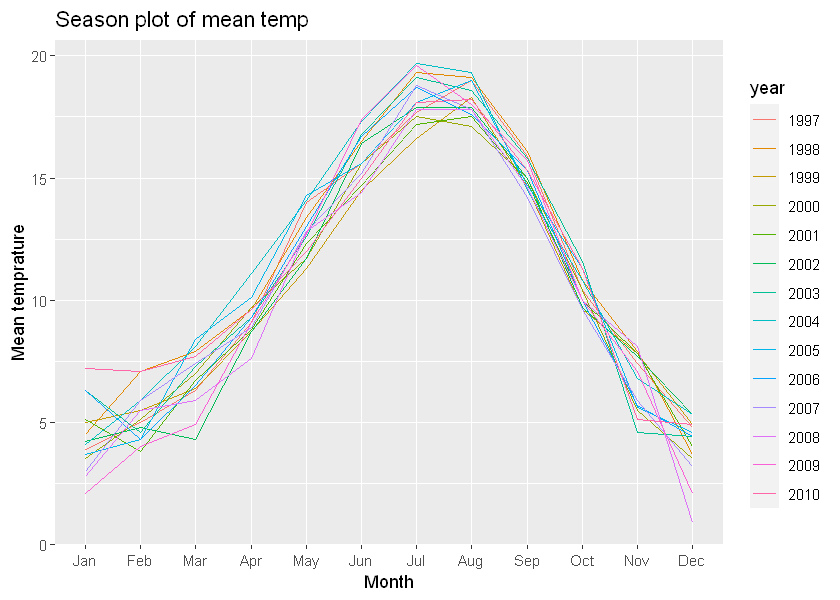

In [101]:
### Time series and Sesonal plot of the Mean temprature.


options(repr.plot.width=7, repr.plot.height=5)
par(mar=c(2,1, .1, .1))
autoplot(alldata.ts[,2])+
ggtitle('Time plot of mean temp')+
ylab('Mean temprature')
ggseasonplot(alldata.ts[,2])+
ggtitle('Season plot of mean temp')+
ylab('Mean temprature')

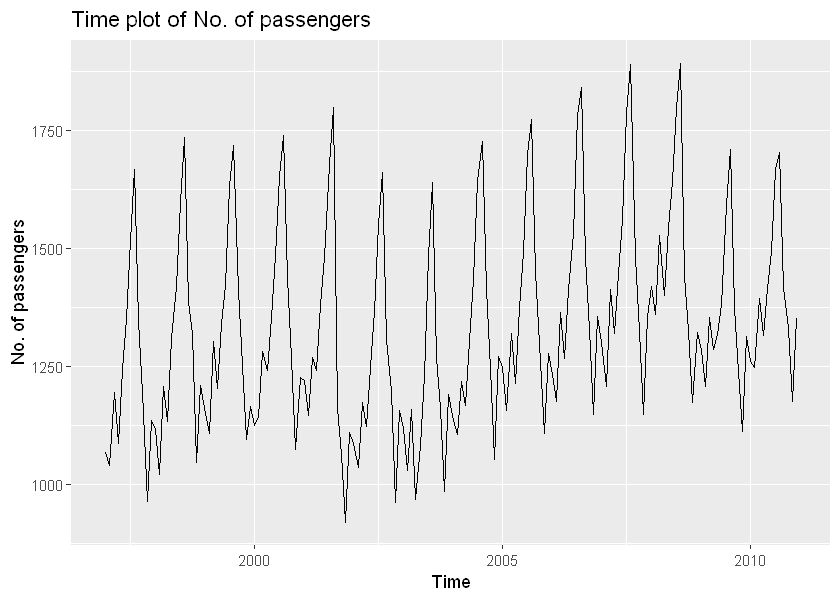

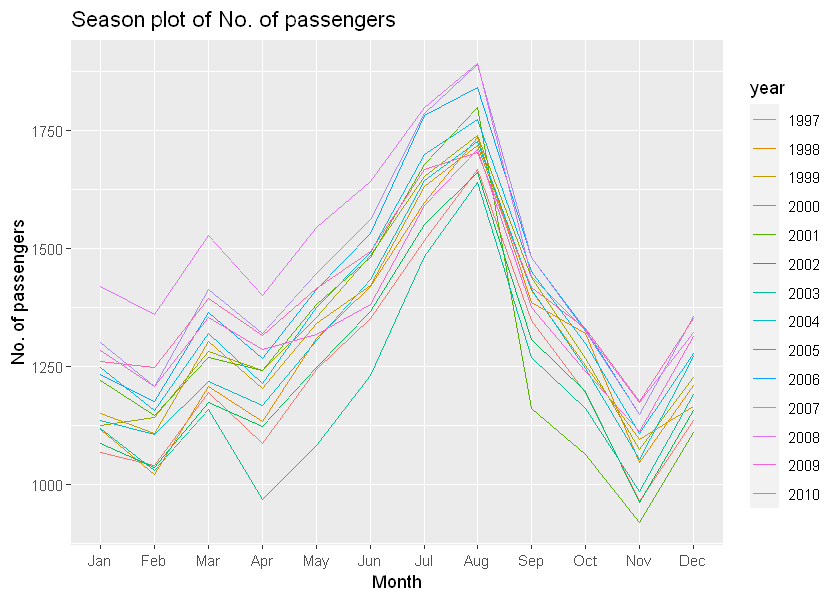

In [102]:
### Time series and Sesonal plot of the Mean temprature.


options(repr.plot.width=7, repr.plot.height=5)
par(mar=c(2,1, .1, .1))
autoplot(alldata.ts[,3])+
ggtitle('Time plot of No. of passengers')+
ylab('No. of passengers')
ggseasonplot(alldata.ts[,3])+
ggtitle('Season plot of No. of passengers')+
ylab('No. of passengers')

When we  plot the data we would see various features of the data in detail and see if there are any particular patterns.

We could see from the plot we have increasing energy usage at the airport with increase in time. To undesrtand that we would see the no. of total passenger arriving at the airport and outside temprature. We could see there was increase in the energy usage to but not signifcant passenger increase or the temprature drop in the outside atmosphere. So we looked  up the major component of the energy consumption at the airport, we found that new systems introduced over the period time like airfeild lighting, increase in more lighitng  in the building, the more energy consumption for the air communication towers, installation of more conveyor belts and also lifts for ease, increase in commercial shops in the  airport premises which required more energy to serve passengers. 

Also we could see more energy usage at the airport increases significantly with in the month of july and august. This is due to increase in the no. of passengers served at the airport. We can see the in plot with the energy usage and total passengers serevd in correspoding period is High. This is due to the fact that more energy are spent in serving the passengers inlcuding the ameneties like conveyor belt, escalator, lift , ground suport.

Also the energy usage goes up in winter months of november and december as the mean temp outside has fallen for the period and it can be seen fron the mean temp plot. 

Also we see that there is reduction in energy usage trend as from the time series plot in 2000-2005, it is due to external factors i.e. there was energy saving committee recomendation in that period which were working on reduction of the energy.

# Divide the data into the training set and the test set (include your code from Part A)

In [122]:
mydata1.ts.train <- window(mydata1.ts,end=c(2007, 12))
mydata1.ts.test <- window(mydata1.ts, start=c(2008, 1))


----

<div class="alert alert-block alert-success">
<a id="Basic"></a>

# Basic forecasting methods
</div>  

Use the basic methods we have learned to develop forecasts for the test set. Plot in the following colours:  

mean method (blue)  
drift method (green)  
naïve method (red)  
seasonal naïve method (purple)  

 
## Visual comparison and assessment of basic methods 

Plot the training set and test set data in black. Include the forecasts of the test set for each of the basic forecasting methods in a different colour (colours are given above) with a legend to explain.  

Prepare the plot for publication and upload it.

 

From a visual assessment, which of the basic forecasting methods seems to produce the best forecasts of the test set? Discuss briefly. (4 sentences max.)  
    

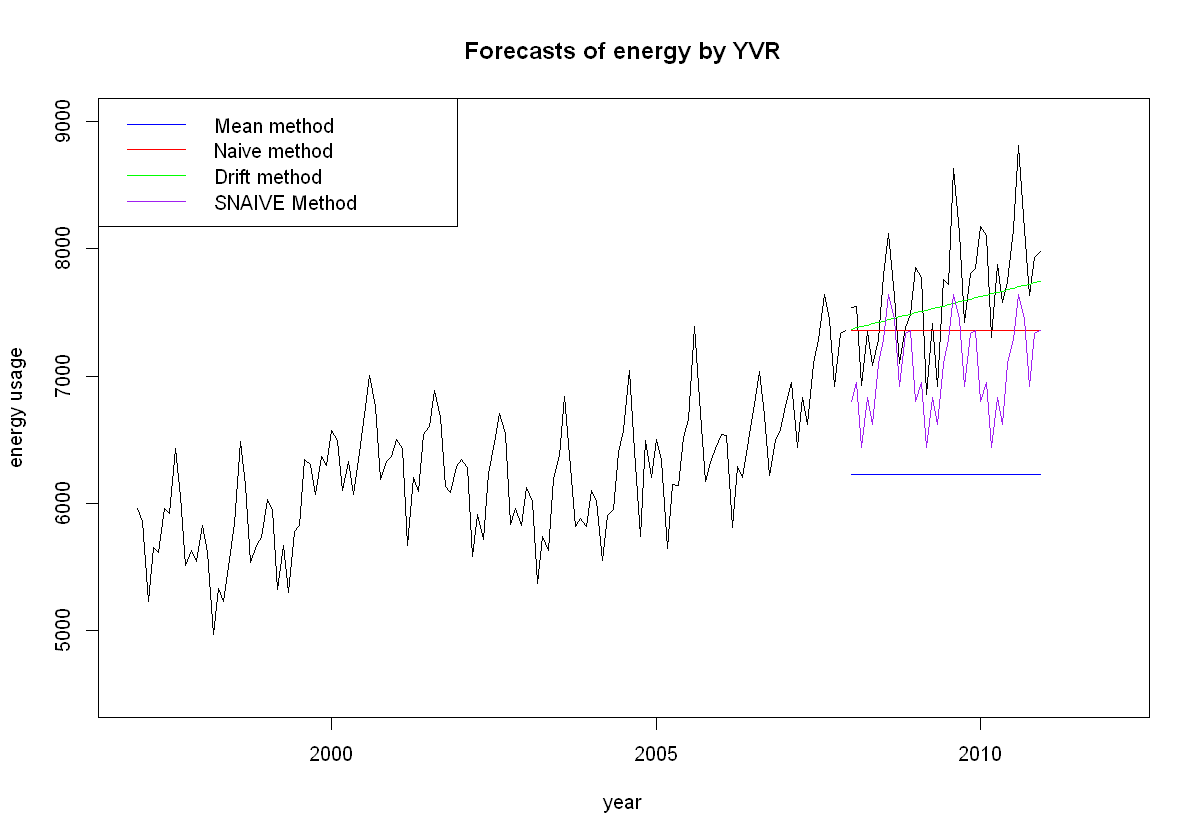

In [129]:
options(repr.plot.width=10, repr.plot.height=7)
par(mfrow=c(1,1))

mean.fit1= meanf(mydata1.ts.train,h=36)
naive.fit2= rwf(mydata1.ts.train,h=36)
drift.fit3= rwf(mydata1.ts.train,drift=TRUE,h=36)
snaive.fit4= snaive(mydata1.ts.train,h=36)

### Ploting the data with the basic 
plot(mydata1.ts.train, main="Forecasts of energy by YVR",xlab="year", ylab= "energy usage", xlim= c(1997, 2012), ylim= c(4500, 9000))
lines(mydata1.ts.test)
lines(mean.fit1$mean,col="blue", pch= 20)
lines(naive.fit2$mean,col="red", pch = 20)
lines(drift.fit3$mean,col="green", pch = 20)
lines(snaive.fit4$mean,col="purple", pch= 20)
legend("topleft",lty=1,col=c("blue", "red", "green", "purple"), legend=c("Mean method","Naive method","Drift method", "SNAIVE Method"))


## Accuracy measures 
Create a table with the RMSE, MAE, MAPE, and MASE for the test set for each of the four basic methods

In [130]:
table = rbind(accuracy(mean.fit1, mydata1.ts.test)[2,c(2,3,5,6)],
accuracy(naive.fit2, mydata1.ts.test)[2,c(2,3,5,6)],
accuracy(drift.fit3, mydata1.ts.test)[2,c(2,3,5,6)] ,
accuracy(snaive.fit4, mydata1.ts.test) [2,c(2,3,5,6)])

rownames(table)= c('Mean', 'Naive', 'Drift', 'Snaive')
table

,RMSE,MAE,MAPE,MASE
Mean,1528.4982,1463.7955,18.775576,5.524104
Naive,550.0588,443.1944,5.603453,1.672537
Drift,415.9790,328.4824,4.213286,1.239634
Snaive,698.6573,626.8333,8.038624,2.365558


## Comparison of basic methods
Based on the accuracy measures for the test set, which of the basic forecasting methods seems to forecast the test set the best? Interpret the MASE for this method. (4 sentences max.) 

Based on the accuracy of the methods, we would choose the Drift method as it has the lowest value for the RMSE, MAE, MAPE, MASE.

For the MASE,(Mean absolute scaled error ), Values greater than one indicate that in-sample one-step forecasts from the naïve method perform better than the forecast values under consideration. When comparing forecasting methods, the method with the lowest MASE is the preferred method.
In this, our Drift model have the lowest values MASE, though it greater than 1 , buts its performing the better forecast as compared to the model. 

----

<div class="alert alert-block alert-success">
<a id="ETS"></a>

# Exponential Smoothing (ETS) model

Fit ETS models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix A**.
    
</div>    

## What is the model, using the ETS(__, __, __) notation? 

In [131]:
model1 <- ets(mydata1.ts.train, model="AAA", damped=FALSE) 
model1
#ETS(A, A, A) 

ETS(A,A,A) 

Call:
 ets(y = mydata1.ts.train, model = "AAA", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.7846 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5879.3546 
    b = 12.3652 
    s = -36.7977 -27.2016 -238.1219 321.0426 666.3048 232.4424
           58.5104 -349.8579 -192.2142 -564.3842 38.3341 91.9432

  sigma:  134.6878

     AIC     AICc      BIC 
1955.855 1961.224 2004.863 

## What are the estimates of the smoothing parameters?

Smoothing parameters:
 -   alpha = 0.7846 
 -   beta  = 1e-04 
 -   gamma = 1e-04 

## Explain why this model is appropriate based on the features of the data.

We have chosen the ETS(AAA) model as from the time seriese dataset plot. This model has lowest AIC values among the other models compared. ALso this model fit well on our data. 
We can visually see that the data has trend, seasonality and an additive pattern in the errors. Our model ETS (A A A) is accounting for  Addtive error, Additive trend and Additive seasonality which is present in our data and would be producing the best model forecast. 
Also our model is producing MAE, RMSE, MASE values for the test data which means our model fits well on our data.

## Model plot 

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

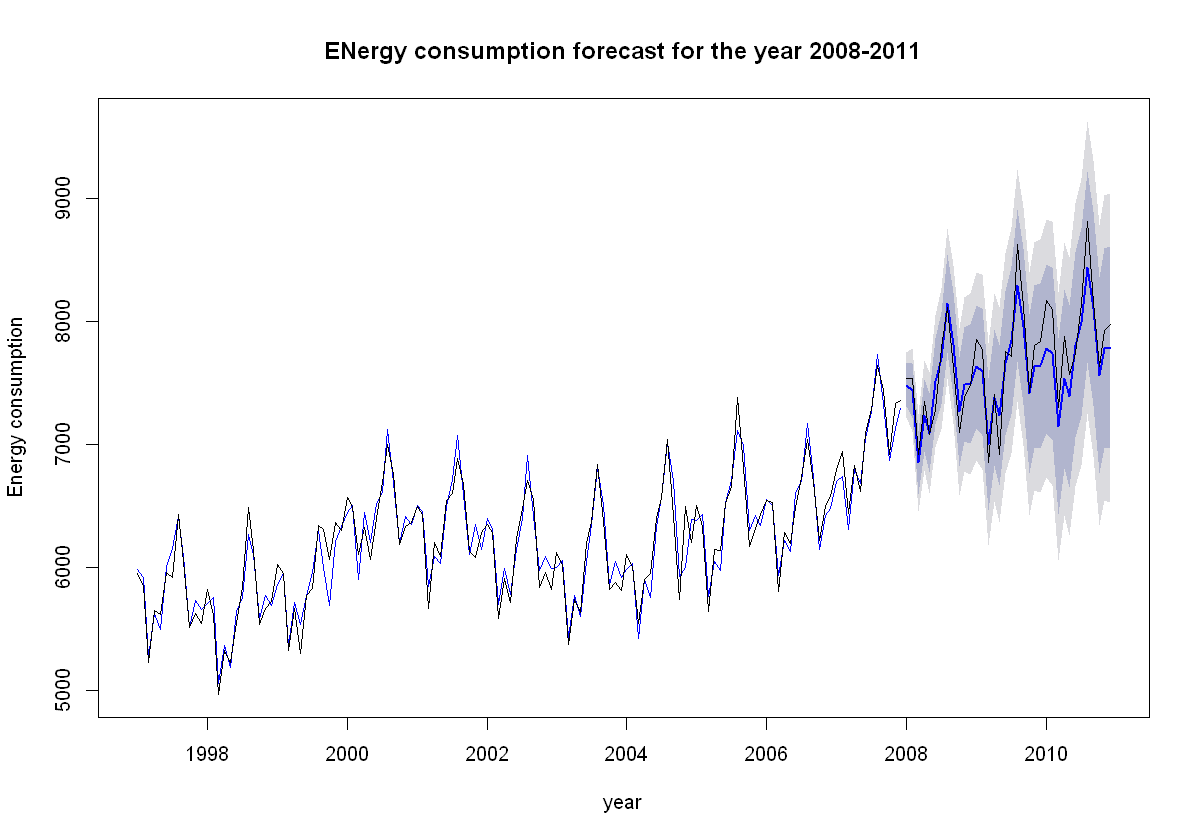

In [137]:
#plot with forecast 

plot(forecast(model1, h=36), main= 'ENergy consumption forecast for the year 2008-2011', ylab= "Energy consumption", xlab= "year")
lines(fitted(model1), col="blue")
lines(mydata1.ts.test)
lines(mydata1.ts.train)

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ETS models that you tried. (Present any values, then 4 sentences max.)

In [148]:
#Please run the full file as models in appendix have to be runned 
accuracy <- round(rbind(accuracy(model1)[1,c(2,3,5,6)],
                        accuracy(model2)[1,c(2,3,5,6)],
                        accuracy(model3)[1,c(2,3,5,6)],
                        accuracy(model4)[1,c(2,3,5,6)],
                        accuracy(model5)[1,c(2,3,5,6)]), 3)

In [150]:
AICc <- data.frame(AICc = c(model1$aicc,
                            model2$aicc,
                            model3$aicc,
                            model4$aicc,
                            model5$aicc))
AICc <- round(AICc, 2)

In [151]:
models <- data.frame(Models = c("MODEL1", "MODEL2", "MODEL3", "MODEL4", "MODEL5"))

In [152]:
fit.model <- cbind(models, accuracy, AICc); fit.model

Models,RMSE,MAE,MAPE,MASE,AICc
MODEL1,126.261,98.958,1.594,0.373,1961.22
MODEL2,126.370,99.442,1.603,0.375,1963.00
MODEL3,127.128,98.494,1.575,0.372,1965.96
MODEL4,362.059,286.784,4.678,1.082,2207.18
MODEL5,155.862,123.011,1.974,0.464,2019.16


We wanted to choose the model with lower AICc values. From the above table we can see that Model1 is the best model with lower AICc values and also the lowest RMSE and MASE values. THis makes our model good fit. 

- **Models	RMSE	MAE	MAPE	MASE	AICc**
- **MODEL1	126.261	98.958	1.594	0.373	1961.22**

## Accuracy measures (1 mark)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [154]:
accuracy(forecast(model1), mydata1.ts.test)[2,c(2,3,5,6)]

RMSE         MAE        MAPE        MASE 
158.4283968 130.9203966   1.7253682   0.4940703

## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set. Remember that you can compare it to the basic methods. (4 sentences max.)

The model was fitting very well as can be seen from the values. MASE value is very lower than 1, which means our model did well in predicting the values. And would be good model to foreacst in future.
The model1 choosen have the lowest values for RMSE MAE MAPE MASE values of the all models

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

In [176]:
res <- residuals(model1)
mean(res)

[1] -1.171192

 the value is near to zero but not zero so there might be some bias in the model. 


	Ljung-Box test

data:  Residuals from ETS(A,A,A)
Q* = 14.031, df = 8, p-value = 0.08095

Model df: 16.   Total lags used: 24



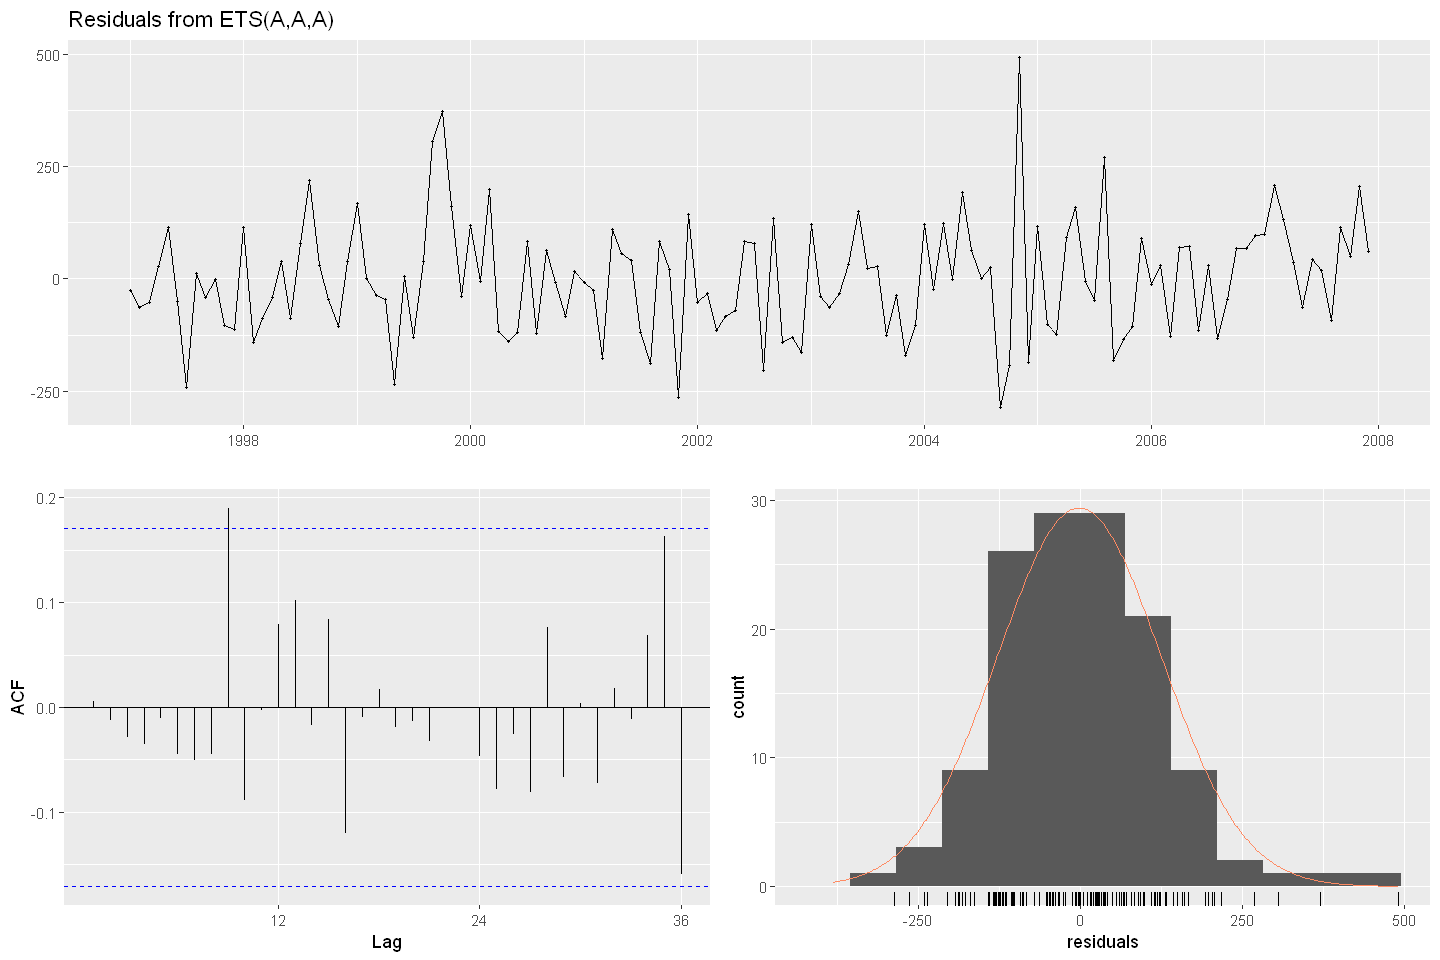

In [175]:
checkresiduals(model1)


In [177]:
Box.test(residuals(model1), type= 'Ljung', lag=24)


	Box-Ljung test

data:  residuals(model1)
X-squared = 14.031, df = 24, p-value = 0.9459


All the properties as met as can be seen in the plot. We have histogram as that is unimodal, the acf plot show no significant auto co-relaion as no line is out of the blue lines in the plot.  

- From the residual plot we can see that the there is not much variance and the residuals are not spreading out.
- ACF plot just have one plot significant autocorealtion which could be due to randomness and also we wont worry much as we expect our 5% values to be more than the blue lines.
- From the histogram we can see that we have the normal distribution of the values.

**Interpret the results of a portmanteau test for autocorrelations.** 

**Hypothesis**

H0: There first 24 autocorrelations are not significantly different from the white noise process.

HA: There first 24 autocorrelations are significantly different from the white noise process.

<b>Number of lags tested:</b>
Lags: 24

<b>Test statistic: </b>
Q* = 14.031

<b>P-value:</b>
p-value = 0.9459

<b>Decision and Conclusion: </b>
p-value>alpha 0.05,

*We failed to reject H0. It means that are no significant autocorrelations in the residuals of the first 24 lags.* 

----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
Fit ARIMA models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix B**.
    
</div>    

## What is the model, using the ARIMA(p, d, q)X(P, D, Q)m notation? (0.25 marks)

In [155]:
# best model
fit.arima.1 <- Arima(mydata1.ts.train, order=c(0,1,3), seasonal=c(0,1,1))
summary(fit.arima.1)

Series: mydata1.ts.train 
ARIMA(0,1,3)(0,1,1)[12] 

Coefficients:
          ma1     ma2      ma3     sma1
      -0.2066  0.0099  -0.0413  -0.8951
s.e.   0.0927  0.0990   0.0955   0.1864

sigma^2 estimated as 19076:  log likelihood=-762.41
AIC=1534.81   AICc=1535.34   BIC=1548.71

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 10.29461 128.9141 94.07808 0.1369825 1.496286 0.3550339
                     ACF1
Training set -0.004686377


## What are the estimates of the parameters? (0.25 marks)

Coefficients:
-        **ma1     ma2      ma3      sma1**
-       **-0.2066   0.0099   -0.0413   -0.8951**
- s.e.   **0.0927  0.0990    0.0955     0.1864**


## Appropriateness of model (2 marks)
Explain why this model is appropriate based on the features of the data. Include the ACF and PACF plots of the differenced data. (5 sentences max.)

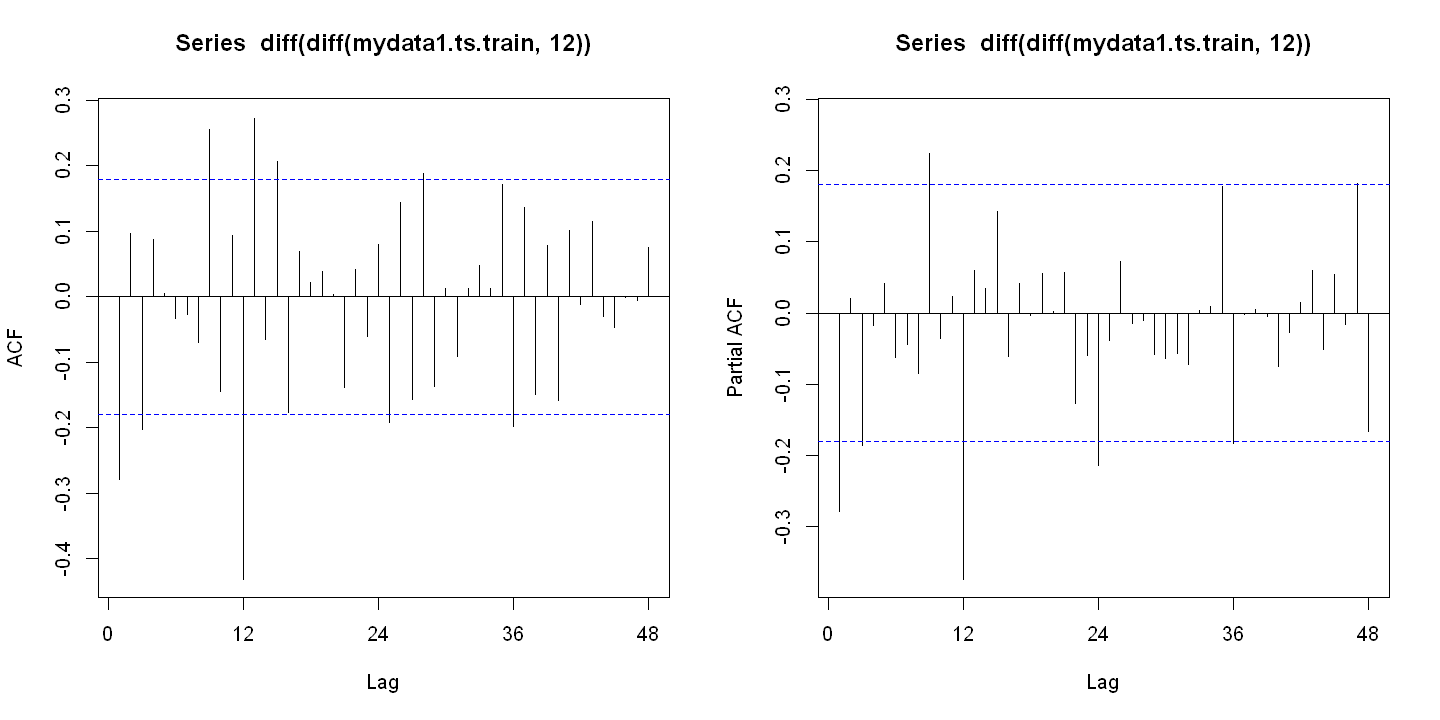

In [157]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))

Acf(diff(diff(mydata1.ts.train, 12)), lag.max=48)
Pacf(diff(diff(mydata1.ts.train, 12)), lag.max=48)

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

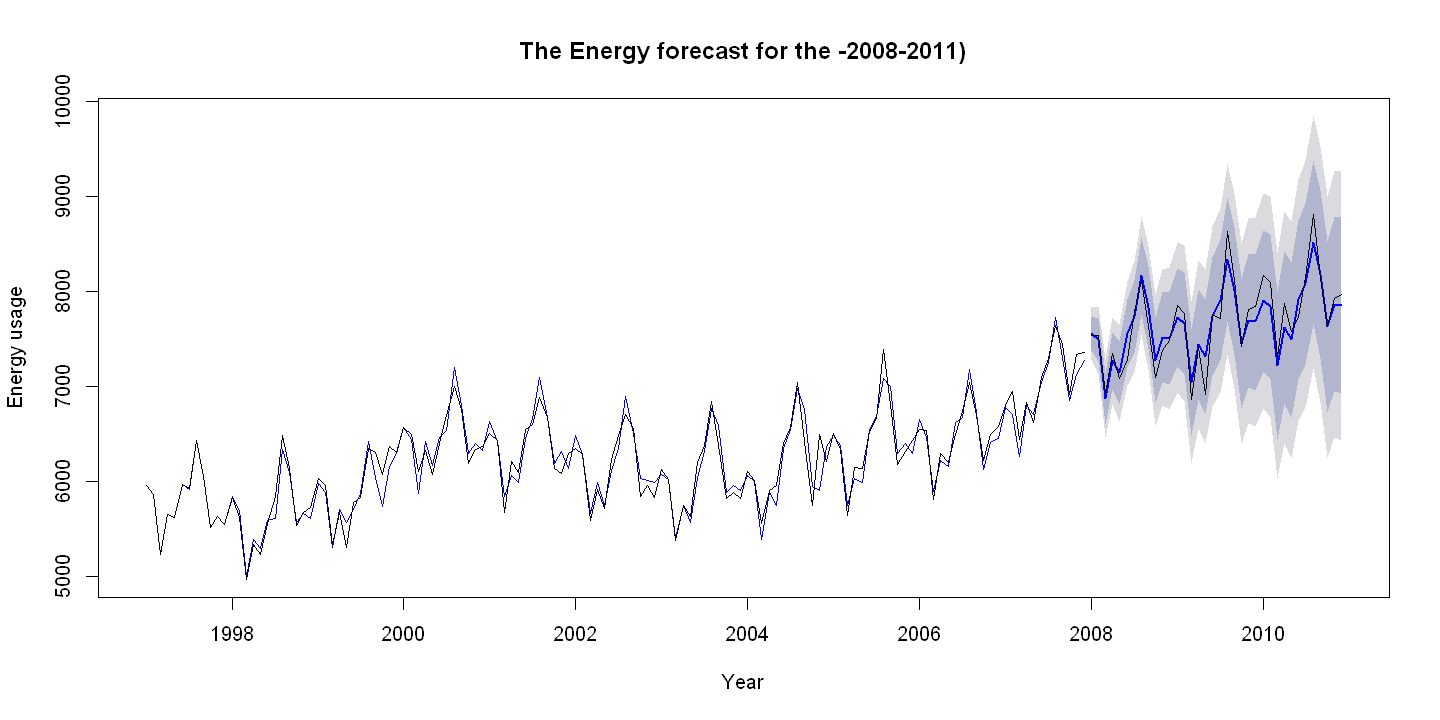

In [164]:
# lowest AICc
plot(forecast(fit.arima.1, h=36), xlab= "Year", ylab= "Energy usage", main= "The Energy forecast for the -2008-2011)")
lines(fitted(fit.arima.1), col="blue")
lines(mydata1.ts.train)
lines(mydata1.ts.test)

## Goodness of fit

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ARIMA models that you tried. (Present any values, then 4 sentences max.)

In [165]:
accuracy <- round(rbind(accuracy(fit.arima.1)[1,c(2,3,5,6)],
                        accuracy(fit.arima.2)[1,c(2,3,5,6)],
                        accuracy(fit.arima.3)[1,c(2,3,5,6)],
                        accuracy(fit.arima.4)[1,c(2,3,5,6)],
                        accuracy(fit.arima.5)[1,c(2,3,5,6)]), 3)

In [166]:
AICc <- data.frame(AICc = c(fit.arima.1$aicc,
                            fit.arima.2$aicc,
                            fit.arima.3$aicc,
                            fit.arima.4$aicc,
                            fit.arima.5$aicc))
AICc <- round(AICc, 2)

In [167]:
models <- data.frame(Models = c("fit.arima.1", "fit.arima.2", "fit.arima.3", "fit.arima.4", "fit.arima.5"))

In [168]:
fit.arima <- cbind(models, accuracy, AICc); fit.arima

Models,RMSE,MAE,MAPE,MASE,AICc
fit.arima.1,128.914,94.078,1.496,0.355,1535.34
fit.arima.2,128.984,94.150,1.498,0.355,1535.49
fit.arima.3,137.130,98.265,1.562,0.371,1544.03
fit.arima.4,120.485,87.449,1.393,0.330,1537.21
fit.arima.5,126.439,92.240,1.467,0.348,1539.81


## Accuracy measures 
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [169]:
accuracy(forecast(fit.arima.1), mydata1.ts.test)[2,c(2,3,5,6)]

RMSE         MAE        MAPE        MASE 
156.1406217 123.3283295   1.6436425   0.4654192

## Accuracy of forecasts 
Discuss how well this model forecasts the test set. Remember that you can compare it to the basic methods. (4 sentences max.)

The model was fitting very well as can be seen from the values. MASE value is only 0.465, which means it forecasts considerably better than seasonal naive method, with only 46.5% of forecast errors from seasonal naive method. Our model did well in predicting the values and it would be good model to foreacst in future.

## Residual diagnostics 

a) Calculate the mean of the residuals. Does this value indicate bias? 
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots?   
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence.

In [170]:
mean(residuals(fit.arima.1))

[1] 10.29461


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)(0,1,1)[12]
Q* = 17.413, df = 20, p-value = 0.626

Model df: 4.   Total lags used: 24



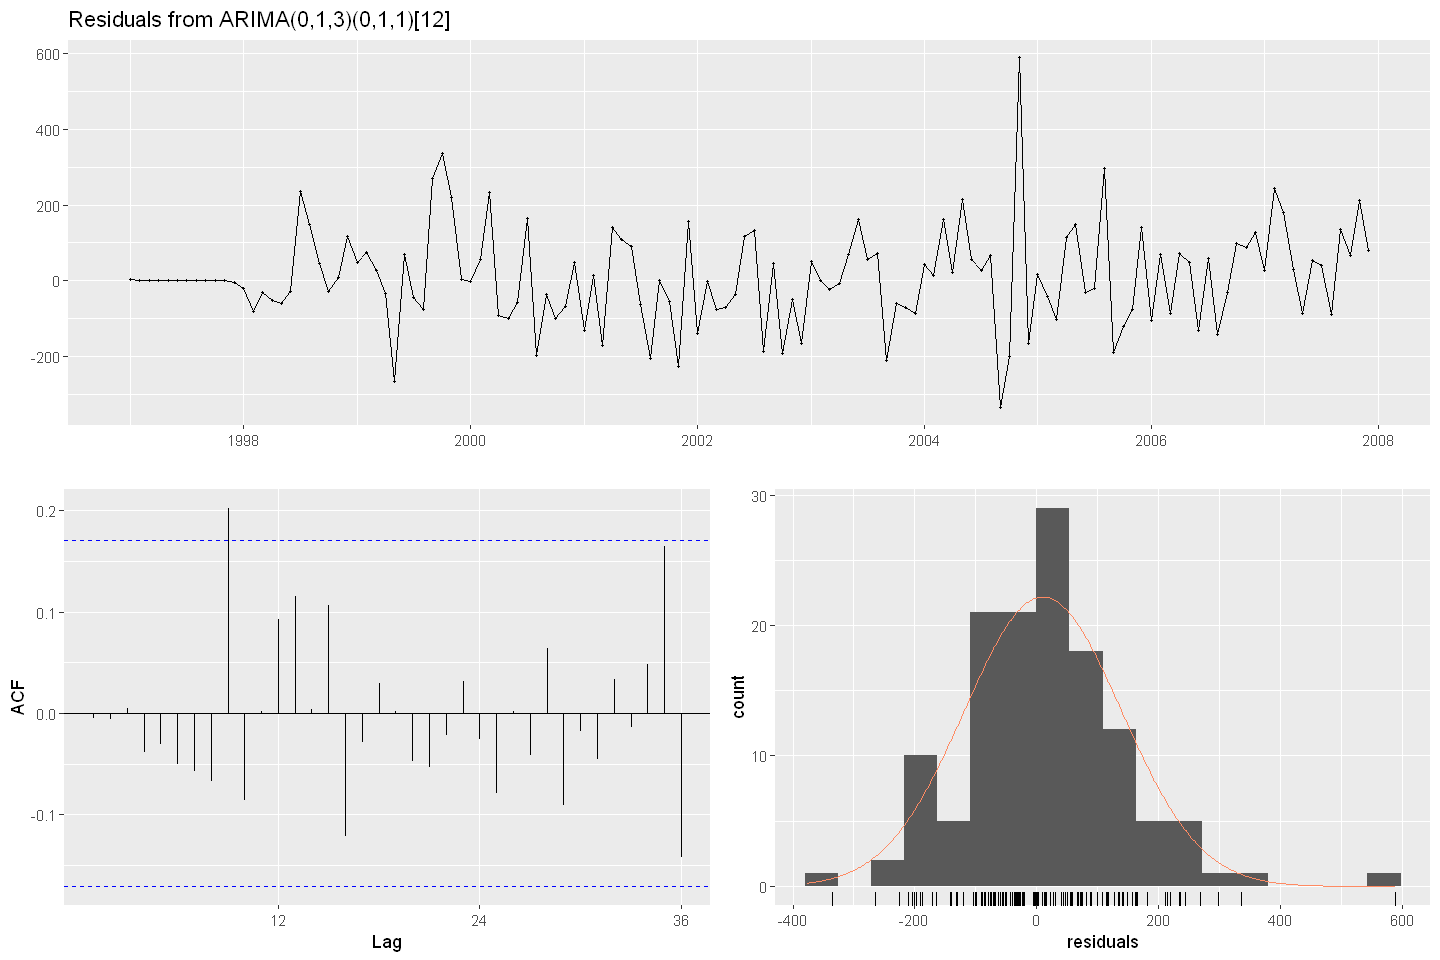

In [171]:
options(repr.plot.width=12, repr.plot.height=8)
checkresiduals(fit.arima.1)

In [172]:
Box.test(residuals(fit.arima.1), type="Ljung", lag=36) # Box-Ljung test


	Box-Ljung test

data:  residuals(fit.arima.1)
X-squared = 30.552, df = 36, p-value = 0.7251


----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models 

Compare your exponential smoothing/ETS model, and your ARIMA model to the basic methods. Which one is your best forecasting method? Explain using support from previous questions as well as by creating a plot to compare the forecasts for the test set for the different methods.  
<div>


<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts 

Calculate the point forecasts using your chosen method for the next three years (January 2011 through December 2013).

Plot the entire dataset with the forecasts from your best forecasting method, including prediction intervals.
</div>

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7562.884 7383.764 7742.004 7288.944 7836.824
Feb 2008       7491.452 7263.022 7719.881 7142.098 7840.805
Mar 2008       6872.471 6602.691 7142.251 6459.878 7285.064
Apr 2008       7270.035 6967.842 7572.227 6807.871 7732.198
May 2008       7143.437 6811.986 7474.887 6636.527 7650.346
Jun 2008       7562.592 7204.265 7920.919 7014.578 8110.606
Jul 2008       7733.368 7350.045 8116.692 7147.125 8319.612
Aug 2008       8167.051 7760.263 8573.839 7544.923 8789.179
Sep 2008       7832.855 7403.885 8261.825 7176.802 8488.908
Oct 2008       7277.930 6827.869 7727.990 6589.622 7966.237
Nov 2008       7516.320 7046.105 7986.536 6797.188 8235.452
Dec 2008       7507.532 7017.993 7997.071 6758.846 8256.217
Jan 2009       7727.865 7213.160 8242.570 6940.692 8515.038
Feb 2009       7663.420 7126.411 8200.429 6842.136 8484.704
Mar 2009       7047.398 6488.916 7605.880 6193.274 7901.523
Apr 2009       7444.962 6866.040 8023.88

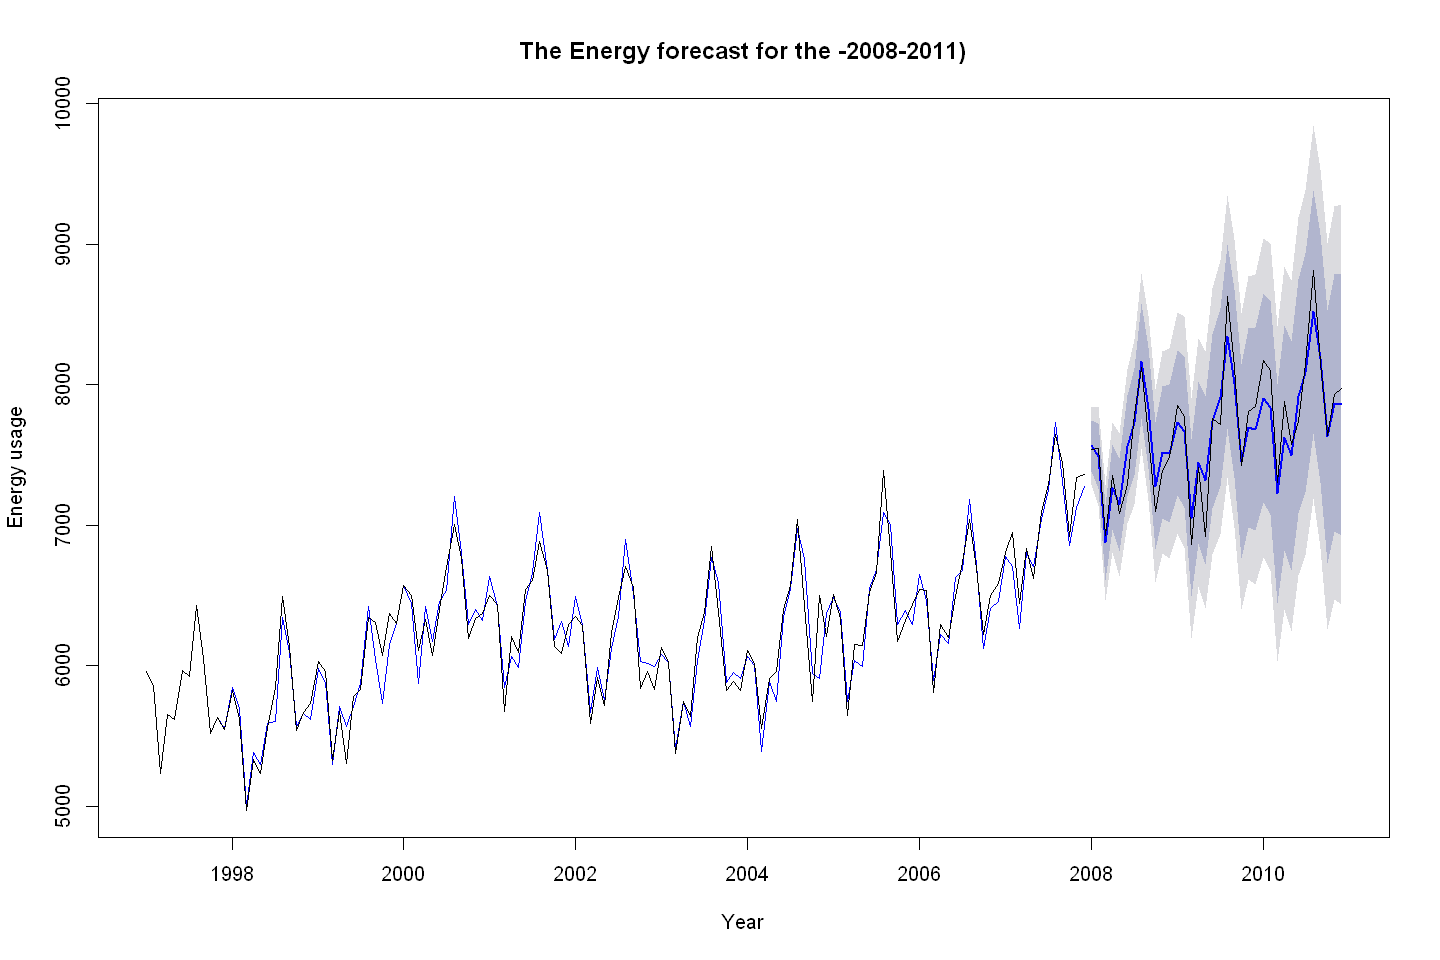

In [195]:
final.forecast <- forecast(fit.arima.1, h=36)
final.forecast
plot(forecast(fit.arima.1, h=36), xlab= "Year", ylab= "Energy usage", main= "The Energy forecast for the -2008-2011)")
lines(fitted(fit.arima.1), col="blue")
lines(mydata1.ts.train)
lines(mydata1.ts.test)

<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion 

Discuss three limitations of this final model, and recommendations to address these limitations. (300 words max.)
<div>


There are some limitations with the model. We need to adress these limitations and suggest to avoid over relying on the model for some scenario. We could suggest some steps to remove minimise these limitaions. 
- ARIMA models, as all forecasting methods, are essentially backward looking. Such that, the long term forecast eventually goes to be straight line and poor at predicting series with turning points.
- Our model is trained on limitated data of no. of passenegers, area. So we could have more data about the usage of electric equipments added at the airport over the time and also the commercial shops and their powerusage to train our model better.
- Also We see that we have variation in data and our model is not adressing them well and this could have impact our forecasted values in for the future.

So to address these limitaions we could try diffrent type of methodology for foracsting and compare the values. For the other model limitations we could easily collect more data from the airport authority and add these in our model and train our model robustly. 
For the last limitaions we could try transformations of data, even though we tried box cox and also date adjustment in our models and we did not see much varaitions. But still we could try other transformations or try to manage the occasional fluctuion from the plot.

<div class="alert alert-block alert-success">
<a id="Explanatory"></a>

# Explanatory model (200 words max.) (2 marks)

Describe a possible explanatory model to try (you do not have to create this model). Explain the process required to be able to use this model to forecast.  
</div>

We Would use the multi linear regression model , we studied in their previous courses. We would be using our full dataset and we would then take  Year as our expalnatory variable and energy usage as the dependent variable. We plot the dataset and see if there is linearity and other issue with plot. We would then perform trasnformations accordingly to make the model linear. Also we would check the various varaibles impact on the model and also try interaction terms to see if it helps with the model.

Than after choosing the best model we would forecast for the 2008-2011.

----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models (1 mark)
</div>

In [140]:
# ETS models
model1 <- ets(mydata1.ts.train, model="AAA") 
model1

ETS(A,A,A) 

Call:
 ets(y = mydata1.ts.train, model = "AAA") 

  Smoothing parameters:
    alpha = 0.7846 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5879.3546 
    b = 12.3652 
    s = -36.7977 -27.2016 -238.1219 321.0426 666.3048 232.4424
           58.5104 -349.8579 -192.2142 -564.3842 38.3341 91.9432

  sigma:  134.6878

     AIC     AICc      BIC 
1955.855 1961.224 2004.863 

In [141]:
# ETS models
model2 <- ets(mydata1.ts.train, model="MAA") 
model2

ETS(M,A,A) 

Call:
 ets(y = mydata1.ts.train, model = "MAA") 

  Smoothing parameters:
    alpha = 0.8082 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5803.689 
    b = 17.436 
    s = -37.9185 -34.4259 -248.9098 320.0811 666.5463 231.972
           63.7197 -351.3296 -188.4109 -568.7838 53.8096 93.6498

  sigma:  0.0218

     AIC     AICc      BIC 
1957.628 1962.996 2006.636 

In [142]:
# ETS models
model3 <- ets(mydata1.ts.train, model="MAM") 
model3

ETS(M,Ad,M) 

Call:
 ets(y = mydata1.ts.train, model = "MAM") 

  Smoothing parameters:
    alpha = 0.8218 
    beta  = 0.0056 
    gamma = 1e-04 
    phi   = 0.9686 

  Initial states:
    l = 5803.1338 
    b = 14.0581 
    s = 0.9895 0.994 0.9604 1.0508 1.1055 1.0357
           1.0108 0.9457 0.9681 0.9069 1.009 1.0237

  sigma:  0.022

     AIC     AICc      BIC 
1959.907 1965.961 2011.798 

In [145]:
model4 <- ets(mydata1.ts.train, model="MAN", damped= FALSE) 
model4

ETS(M,A,N) 

Call:
 ets(y = mydata1.ts.train, model = "MAN", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.7001 
    beta  = 1e-04 

  Initial states:
    l = 5716.981 
    b = 26.6605 

  sigma:  0.0583

     AIC     AICc      BIC 
2206.700 2207.177 2221.114 

In [147]:
model5 <- ets(mydata1.ts.train, model="MMM", damped= FALSE) 
model5

ETS(M,M,M) 

Call:
 ets(y = mydata1.ts.train, model = "MMM", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.3413 
    beta  = 1e-04 
    gamma = 0.1792 

  Initial states:
    l = 5860.1635 
    b = 1.002 
    s = 0.9849 0.9771 0.9701 1.063 1.1023 1.0146
           1.0217 0.9419 0.9702 0.8967 1.0181 1.0394

  sigma:  0.027

     AIC     AICc      BIC 
2013.791 2019.160 2062.799 

---

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models (1 mark)
</div>

In [160]:
fit.arima.2 <- Arima(mydata1.ts.train, order=c(3,1,0), seasonal=c(0,1,1))
summary(fit.arima.2)



Series: mydata1.ts.train 
ARIMA(3,1,0)(0,1,1)[12] 

Coefficients:
          ar1      ar2      ar3     sma1
      -0.2023  -0.0281  -0.0232  -0.8954
s.e.   0.0923   0.0942   0.0917   0.1859

sigma^2 estimated as 19096:  log likelihood=-762.48
AIC=1534.96   AICc=1535.49   BIC=1548.85

Training set error measures:
                  ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.87671 128.9842 94.15046 0.1308541 1.497663 0.3553071
                     ACF1
Training set -0.007119146


In [161]:
fit.arima.3 <- Arima(mydata1.ts.train, order=c(0,1,3), seasonal=c(3,1,0))
summary(fit.arima.3)



Series: mydata1.ts.train 
ARIMA(0,1,3)(3,1,0)[12] 

Coefficients:
          ma1     ma2      ma3     sar1     sar2     sar3
      -0.2110  0.0374  -0.0813  -0.5382  -0.3713  -0.3523
s.e.   0.0941  0.0985   0.0993   0.0948   0.1047   0.1013

sigma^2 estimated as 21967:  log likelihood=-764.51
AIC=1543.02   AICc=1544.03   BIC=1562.48

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 11.84718 137.1305 98.26453 0.1599773 1.562014 0.3708329
                     ACF1
Training set -0.003269919


In [162]:

fit.arima.4 <- Arima(mydata1.ts.train, order=c(0,1,3), seasonal=c(3,1,1))
summary(fit.arima.4)



Series: mydata1.ts.train 
ARIMA(0,1,3)(3,1,1)[12] 

Coefficients:
          ma1     ma2      ma3    sar1     sar2     sar3     sma1
      -0.1874  0.0081  -0.0837  0.1491  -0.0026  -0.1592  -1.0000
s.e.   0.0940  0.0962   0.0968  0.1006   0.0959   0.1092   0.2976

sigma^2 estimated as 17109:  log likelihood=-759.95
AIC=1535.9   AICc=1537.21   BIC=1558.14

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE      MASE
Training set 11.10528 120.4851 87.4486 0.1510987 1.393063 0.3300155
                     ACF1
Training set -0.007488224


In [163]:
fit.arima.5 <- Arima(mydata1.ts.train, order=c(3,1,3), seasonal=c(0,1,1))
summary(fit.arima.5)


Series: mydata1.ts.train 
ARIMA(3,1,3)(0,1,1)[12] 

Coefficients:
         ar1      ar2     ar3      ma1     ma2      ma3     sma1
      1.1277  -1.1952  0.4077  -1.3314  1.4008  -0.5952  -0.9207
s.e.  0.3973   0.2629  0.3691   0.3635  0.2521   0.3434   0.2374

sigma^2 estimated as 18842:  log likelihood=-761.25
AIC=1538.5   AICc=1539.81   BIC=1560.73

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 10.54754 126.4394 92.24008 0.1416201 1.467088 0.3480977
                    ACF1
Training set -0.01967171


In [196]:
hr=read.csv("C:/Users/abhis/Documents/UBC/Classes/PERIOD4/BABS 502/Projects/whirlpool_csv.csv")
tail(hr)

,Part.number,Price..Unit,Type,Region,Capacity.BTU.Hr,Weight,EER.,Unit.Volume
40,601-0639,33.02,Reciprocating,North America,405,4.42,3.86,45000
41,656-1533,31.98,Scroll,North America,770,8.35,3.19,72000
42,744-9083,31.66,Reciprocating,North America,725,8.17,4.40,41000
43,759-6425,35.36,Reciprocating,North America,465,5.02,4.14,75000
44,845-6688,30.72,Reciprocating,North America,650,7.46,3.67,125000
45,960-0588,32.98,Reciprocating,North America,560,6.13,3.18,62000


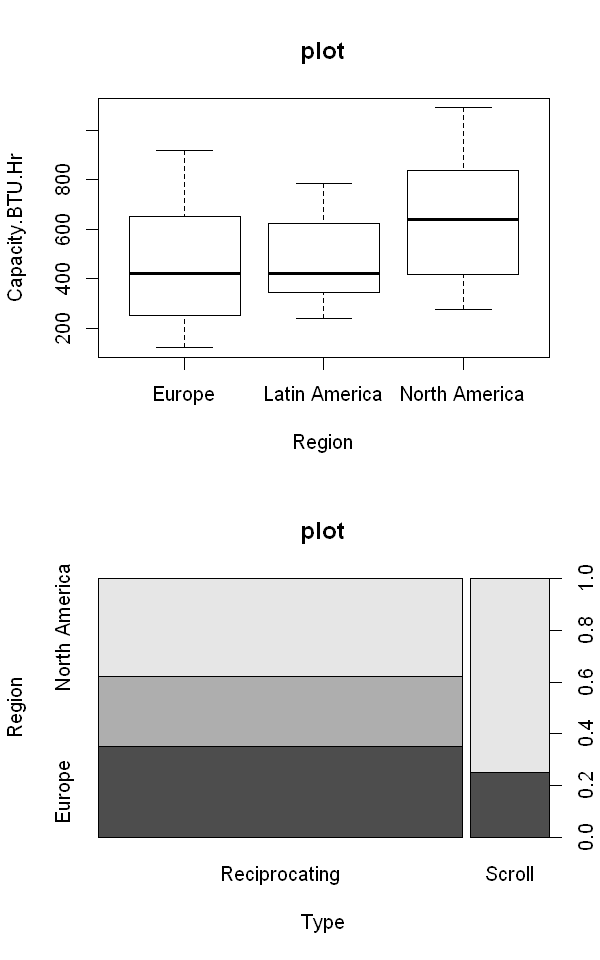

In [212]:
options(repr.plot.width=5, repr.plot.height=8)
par(mfrow=c(2,1))
plot(hr[c(4,5)] , main= "plot")
plot(hr[c(3,4)] , main= "plot")